In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

df = pd.read_csv('IRIS.csv')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Lookup into dataset

In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


## Checking Missing Values

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Checking Duplicates

In [7]:
data = df.drop_duplicates(subset='species')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


In [8]:
df.value_counts('species')

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## Data Visualization

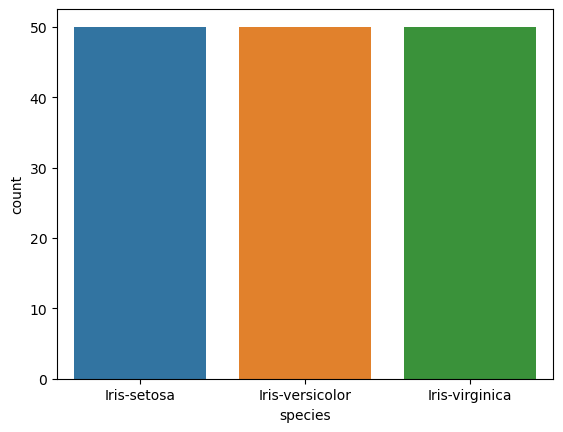

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='species', data=df)
plt.show()

### Relation Between Variables

Example1. Comparing Sepal Length and Sepal Width

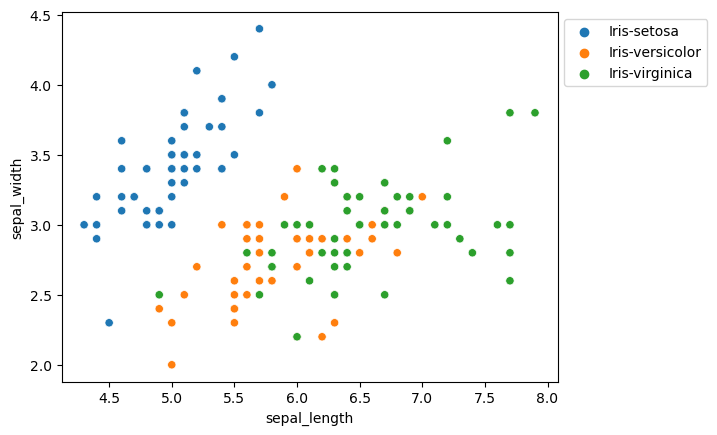

In [10]:
sns.scatterplot(x='sepal_length', y='sepal_width',
                hue='species', data=df)

plt.legend(bbox_to_anchor=(1,1), loc=2)

plt.show()

From the above plot, we can infer that:

- Species Setosa has smaller sepal lengths but larger sepal widths.
- Versicolor Species lies in the middle of the other two species in terms of sepal length and width
- Species Virginica has larger sepal lengths but smaller sepal widths.

Example2. Comparing Petal Length and Petal Width

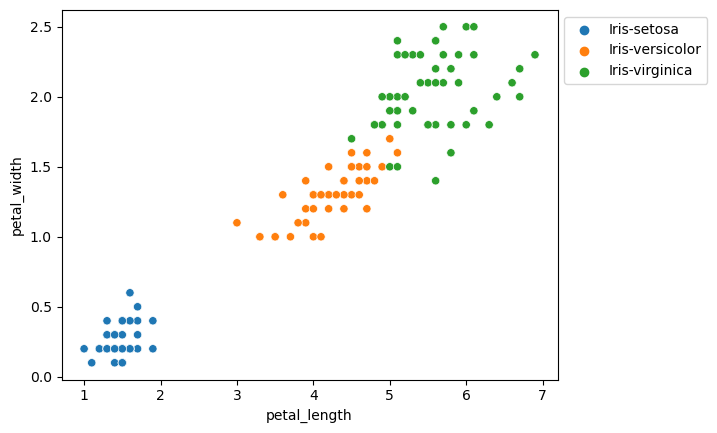

In [11]:
sns.scatterplot(x='petal_length', y='petal_width',
                hue='species', data=df)

plt.legend(bbox_to_anchor=(1,1), loc=2)

plt.show()

From the above plot, we can infer that:

- Species Setosa has smaller petal lengths and widths.
- Versicolor Species lies in the middle of the other two species in terms of petal length and width
- Species Virginica has the largest of petal lengths and widths.

all Columns Relationship with pairplot and multivariate analysis

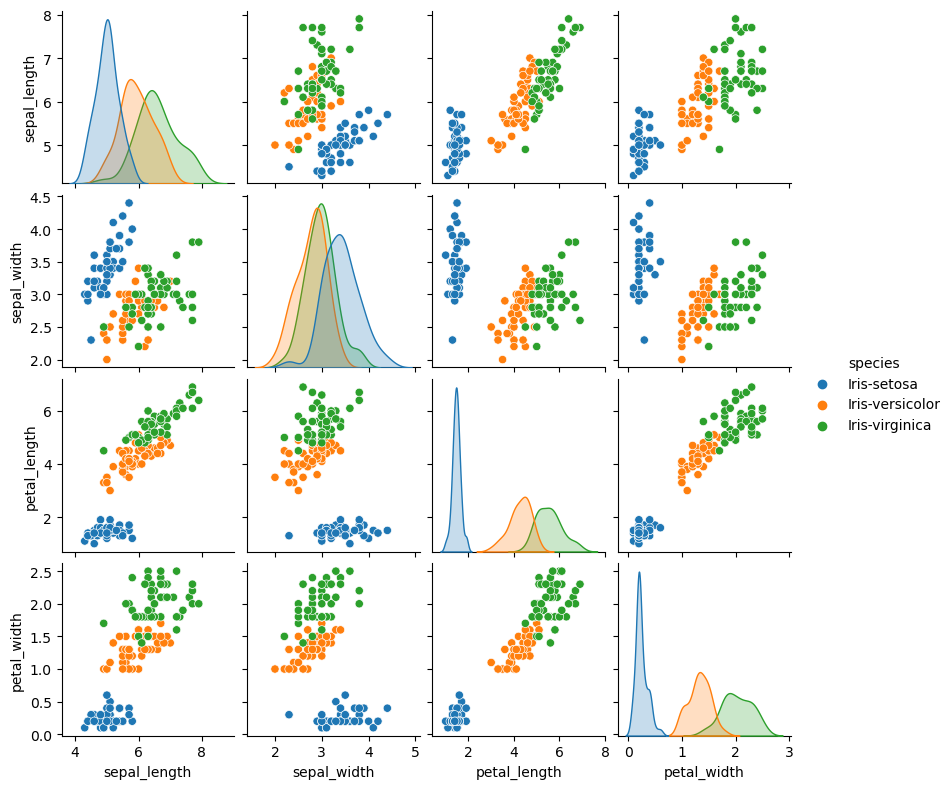

In [12]:
sns.pairplot(df, hue='species', height=2)

### Histograms

(array([48.,  2., 15., 37., 25., 23.]),
 array([0.1, 0.5, 0.9, 1.3, 1.7, 2.1, 2.5]),
 <BarContainer object of 6 artists>)

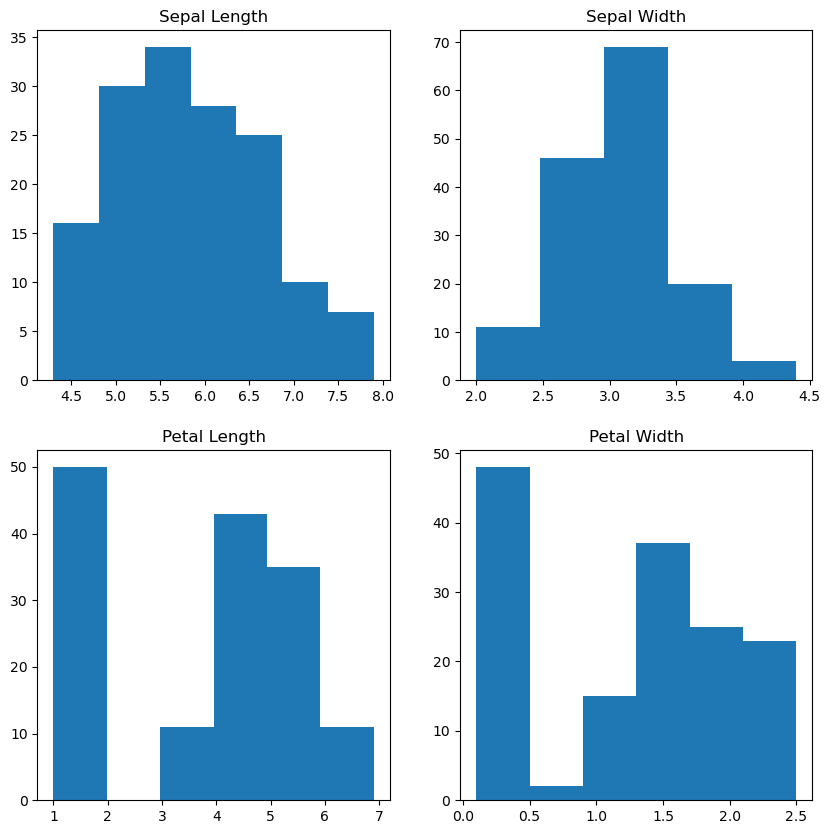

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes[0,0].set_title('Sepal Length')
axes[0,0].hist(df['sepal_length'], bins=7)

axes[0,1].set_title('Sepal Width')
axes[0,1].hist(df['sepal_width'], bins=5)

axes[1,0].set_title('Petal Length')
axes[1,0].hist(df['petal_length'], bins=6)

axes[1,1].set_title('Petal Width')
axes[1,1].hist(df['petal_width'], bins=6)

From the above plot, we can see that:

- The highest frequency of the sepal length is between 30 and 35 which is between 5.5 and 6
- The highest frequency of the sepal Width is around 70 which is between 3.0 and 3.5
- The highest frequency of the petal length is around 50 which is between 1 and 2
- The highest frequency of the petal width is between 40 and 50 which is between 0.0 and 0.5

### Histograms with Distplot

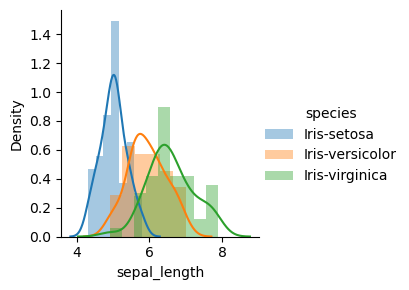

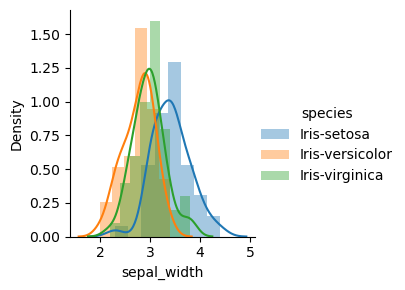

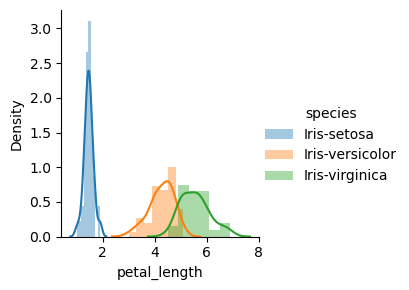

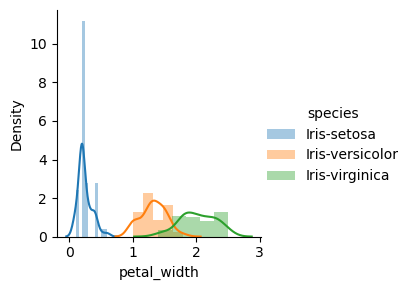

In [14]:
plot = sns.FacetGrid(df, hue='species')
plot.map(sns.distplot, "sepal_length").add_legend()

plot = sns.FacetGrid(df, hue='species')
plot.map(sns.distplot, "sepal_width").add_legend()

plot = sns.FacetGrid(df, hue='species')
plot.map(sns.distplot, "petal_length").add_legend()

plot = sns.FacetGrid(df, hue='species')
plot.map(sns.distplot, "petal_width").add_legend()

plt.show()

From the above plots, we can see that:

- In the case of Sepal Length, there is a huge amount of overlapping.
- In the case of Sepal Width also, there is a huge amount of overlapping.
- In the case of Petal Length, there is a very little amount of overlapping.
- In the case of Petal Width also, there is a very little amount of overlapping.
- So we can use Petal Length and Petal Width as the classification feature.

### Handling Correlation

In [15]:
data.corr(method='pearson')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.999226,0.795795,0.643817
sepal_width,-0.999226,1.000000,-0.818999,-0.673417
petal_length,0.795795,-0.818999,1.000000,0.975713
petal_width,0.643817,-0.673417,0.975713,1.000000


### Heatmaps

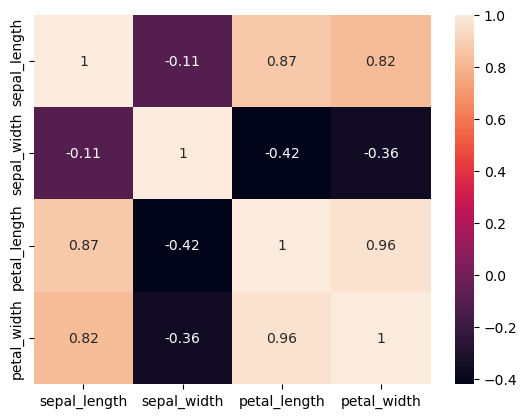

In [16]:
sns.heatmap(df.corr(method='pearson'), annot = True)

plt.show()

From the above graph, we can see that:

- Petal width and petal length have high correlations.
- Petal length and sepal width have good correlations.
- Petal Width and Sepal length have good correlations.

### Box Plots

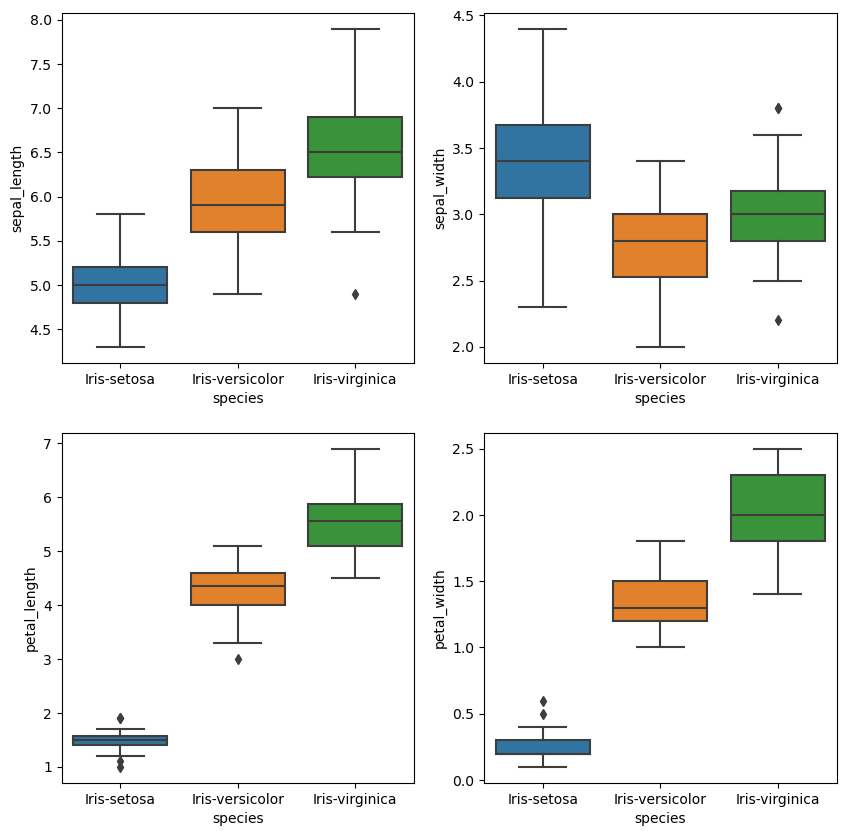

In [17]:
def graph(y):
    sns.boxplot(x='species', y=y, data=df)

plt.figure(figsize=(10,10))

plt.subplot(221)
graph('sepal_length')

plt.subplot(222)
graph('sepal_width')

plt.subplot(223)
graph('petal_length')

plt.subplot(224)
graph('petal_width')

plt.show()

From the above graph, we can see that:

- Species Setosa has the smallest features and less distributed with some outliers.
- Species Versicolor has the average features.
- Species Virginica has the highest features

### Handling Outliers

<Axes: xlabel='sepal_width'>

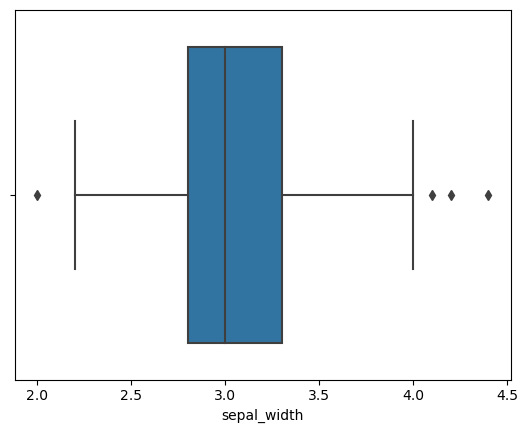

In [18]:
sns.boxplot(x='sepal_width', data=df)

In the above graph, the values above 4 and below 2 are acting as outliers.

### Removing Outliers

Old Shape:  (150, 5)
New Shape:  (146, 5)


<Axes: xlabel='sepal_width'>

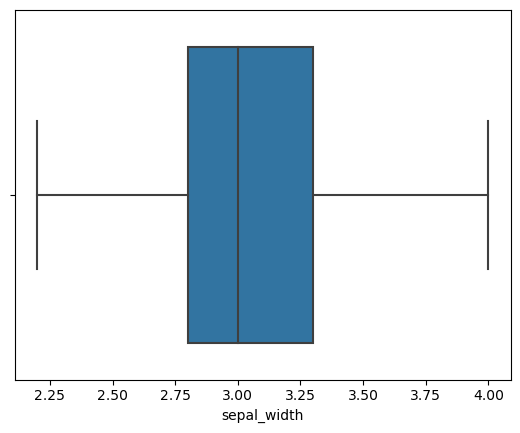

In [19]:
import sklearn
#from sklearn.datasets import load_boston
import numpy as np

Q1 = np.percentile(df['sepal_width'], 25,
                interpolation = 'midpoint')

Q3 = np.percentile(df['sepal_width'], 75,
                interpolation= 'midpoint')

IQR = Q3 - Q1

print('Old Shape: ', df.shape)

upper = np.where(df['sepal_width'] >= (Q3+1.5*IQR))

lower = np.where(df['sepal_width'] <= (Q1-1.5*IQR))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print('New Shape: ', df.shape)

sns.boxplot(x='sepal_width', data=df)